## Linear regression from scratch
This notebook stears through the process of carrying out linear regression with a simple example dataset(https://www.kaggle.com/andonians/random-linear-regression) from scratch as well as using scikit-learn library. Suggestions to improve the explanation approach or anything else are welcome.
I chose the simple dataset to focus on understadning the algorithm(Gradient Descent here).

In [1]:
# %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
# sns.set_style("white")

Training data is loaded in the variable "train". Test data is loaded in the variable "test".

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
# full = [train, test]
train.info()
print("--------------------")
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.0 KB
--------------------


,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


Let us check how many empty/null values are there in training set

In [3]:
# https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

emptyValues = train["y"].isnull().sum()
emptyValues

1

Let us fill the empty values in "y" with the mean of "y"

In [4]:
train["y"] = train["y"].fillna(train["y"].mean()) # Otherwise histogram can't be plotted
train["y"].isnull().sum()                         # No. of empty values in "y"

0

Plot the distribution of x and y values to check whether the data has some absurdness or not

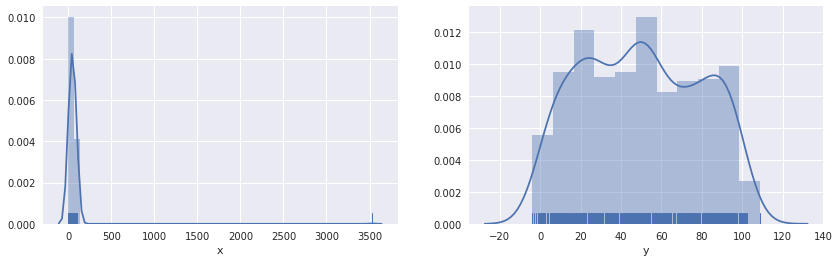

In [5]:
fig, ax =plt.subplots(1,2, figsize=(14,4))
sns.distplot(train["x"], hist=True, kde=True, rug=True, ax=ax[0])
sns.distplot(train["y"], rug=True, ax=ax[1])
plt.show()

We see that there is one value of x near 3500 which can be dropped. Let's find out what is that value.

In [6]:
print(train[train["x"]==train["x"].max()])

               x          y
213  3530.157369  49.939869


We will include the values less than 3500 and then again plot the distribution plots.

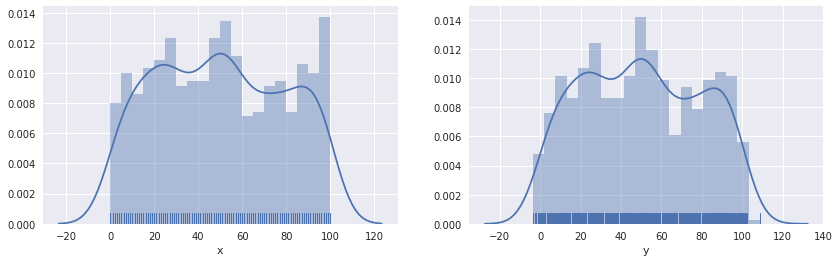

In [7]:

train = train[train.x < 3500]

# AGAIN, LET's SEE HOW DATA IS DISTRIBUTED

fig, ax =plt.subplots(1,2, figsize=(14,4))
sns.distplot(train["x"], hist=True, bins=20, kde=True, rug=True, ax=ax[0])
sns.distplot(train["y"], hist=True, bins=20, kde=True, rug=True, ax=ax[1])
plt.show()

We can now see that there is no absurdness in the data. We'll visualise the x,y data

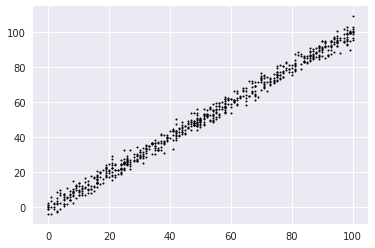

In [8]:
# PLOTTING THE DATA FRAME - x,y values

# sns.lmplot(x='x', y='y', data=train, fit_reg=False)
#                   OR
# sns.lmplot(x=train.x, y=train.y, fit_reg=False)
#                   OR
plt.plot(train["x"], train["y"], 'o', color='black', markersize=2)
#                   OR
# plt.scatter(train["x"], train["y"], marker='o')

To the x-vector, we'll join vector of ones whose size is same as training size'

In [9]:
x = train["x"].values
X = np.column_stack((np.ones(x.shape), x))#stacked ones' column to x vector/comlumn
y = train["y"].values
m = X.shape[0] # Training size

Create a weight vector(theta) having the dimension same as of "X"

In [10]:
# Create a theta vector of size=2(no. of columns of X which is X.ndim)
theta = np.random.random(X.ndim)
# theta = np.array([0, 0])


Create a function to calculate the cost. Also plot the first hypothesis(init_h) with the above value of theta.

[0.29854885 0.1016465 ] 1334.9282250556384


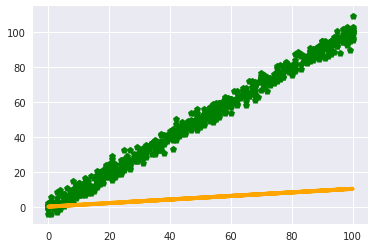

In [11]:

def cost(X, y, theta):# X=(699,2), y=(699,), theta=(2,)yellow
    h = X.dot(theta)           # h=(699,)
    init_h = h
    e = h-y                    # e=(699,)
    sq_J = np.square(e)        # sq_J=(699,)
#     sq_J = e**2                # sq_J=(699,)
    sum_J = np.sum(sq_J)       # scalar value
    J = (0.5/m)*sum_J
    return J, init_h

    
initial_cost, init_h = cost(X, y, theta)
print(theta, initial_cost)

plt.scatter(train["x"], train["y"], color='green', marker='p')
plt.plot(train["x"], init_h, color='orange', linewidth=4)
plt.show()

Now, carry out gradient descent to minimize cost and to get the optimum value of theta

In [12]:

def grad(X, y, theta, alpha, iter):
    cost_history = []
    for i in range(iter):
        h = X.dot(theta)                           # h=(699,)
        e = h-y                                    # e=(699,)
        grad = (1/m)*(X.T.dot(e))                  # X.T=(2,699) * e=(699,)  --->  grad=(2,)
        theta = theta - alpha*grad                 # theta=(2,)
        the_cost,unwanted_h = cost(X, y, theta)    # we dont want init_h returned by cost() function
        cost_history.append(the_cost)
    return theta, the_cost, cost_history, h        # h needed to plot regression line


[0.31170943 0.99411568] 3.9560015683633356


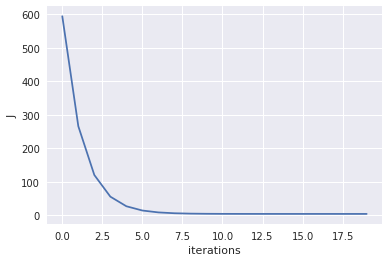

In [13]:
iter = 20
alpha = 0.0001
final_Theta, final_J, cost_history, h  = grad(X, y, theta, alpha, iter)
print(final_Theta, final_J)

plt.plot(range(iter),cost_history)
plt.xlabel("iterations")
plt.ylabel("J")
plt.show()

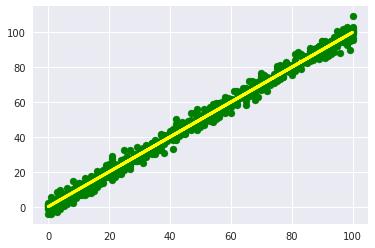

In [14]:
# plt.plot(train["x"], train["y"], 'o', color='green', markersize=3)
# plt.plot(train["x"], h, color='black', markersize=2)

plt.scatter(train["x"], train["y"], color='green', marker='o')
plt.plot(train["x"], h, color='yellow', linewidth=3)

# plt.plot(X,y,'go')
# plt.plot(X,h,'black')#prediction y values (blue line)

plt.show()

 ### Linear regression using scikit-learn library

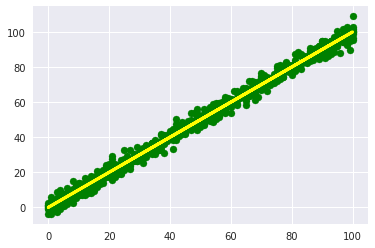

In [15]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
lr=linear_model.LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)                  # predicted y values = h(hypothesis)

plt.scatter(train["x"], train["y"], color='green')
plt.plot(train["x"],y_pred,color='yellow',linewidth=3)
plt.show()

### Let us check accuracy of our model using "mean square error" and "r2 score" from test set

In [16]:
x_test = test["x"].values
X_test = np.column_stack((np.ones(x_test.shape), x_test)) #stacked ones' column to x vector/comlumn
y_test = test["y"]
y_testMean = np.mean(y_test)

h_test = X_test.dot(final_Theta)

sq_sum = sum((y_test - y_testMean)**2)           # "sum()" or "np.sum()", both are correct
res_sum = np.sum((y_test - h_test)**2)

# MEAN SQUARE ERROR
mse_test = res_sum/len(y_test)                     # "len(y_test)" or "y_test.shape[0]", both are correct
# mse_test = mean_squared_error(y_test, h_test)      # mean square error using sklearn.metrics

# R2 SCORE
r2_test = 1-(res_sum/sq_sum)
# r2_test = r2_score(y_test, h_test)                 # r2 score using sklearn.metrics


mse_test, r2_test

(9.561099490165494, 0.9886492751933306)

Let us check the accuracy parameters of training data.

In [17]:
mse_train = np.average((h - y)**2)
r2_train = r2_score(y, h)
mse_train, r2_train

(7.912296543354535, 0.99064888800168)

In [18]:
# Predict the values
inp_x = float(input("What is your input?"))
inp_x = np.array(inp_x)                     #  or "np.array([inp_x])"  ????
inp_X = np.column_stack((np.ones(inp_x.shape), inp_x))
prediction = inp_X.dot(final_Theta)

prediction[0]

What is your input?84


83.81742620155114